SIMPLE LINEAR REGRESSION

In [2]:
import numpy as np

In [3]:
import scipy.stats as ss
import matplotlib.pyplot as plt

In [4]:
n = 100
beta_0 = 5
beta_1 = 2
np.random.seed(1)
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1*x + ss.norm.rvs(loc=0, scale=1, size=n)

Text(0, 0.5, 'y')

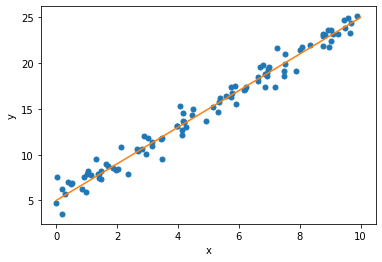

In [5]:
plt.figure()
plt.plot(x, y, 'o', ms=5)
xx = np.array([0,10])
plt.plot(xx, beta_0 + beta_1 *xx)
plt.xlabel('x')
plt.ylabel('y')

In [11]:
"""
mean_x = np.mean(x)
print(mean_x)
mean_y = np.mean(y)
print(mean_y)

m = len(x)

numer = 0
demon = 0
for i in range(m):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    demon += (x[i] - mean_x) ** 2
b_1 = numer / demon
b_0 = mean_y - (b_1 * mean_x)
    
print(b_1, b_0)
"""
from scipy.stats import kurtosis, skew
display(skew(x))
display(kurtosis(x, fisher = True))

display(skew(y))
display(kurtosis(y, fisher = True))


0.016064615767021964

-1.2359093112757917

0.04375118882395684

-1.1994264405385893

In [12]:
def compute_rss(y_estimate, y):
    return sum(np.power(y-y_estimate, 2))

def estimate_y(x, b_0, b_1):
    return b_0 + b_1 * x

rss = compute_rss(estimate_y(x, beta_0, beta_1), y)

In [7]:
rss = []
slopes = np.arange(-10, 15, 0.001)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))

In [8]:
ind_min = np.argmin(rss)
print("Estimate for the slope", slopes[ind_min])

Estimate for the slope 2.003999999993347


Text(0, 0.5, 'RSS')

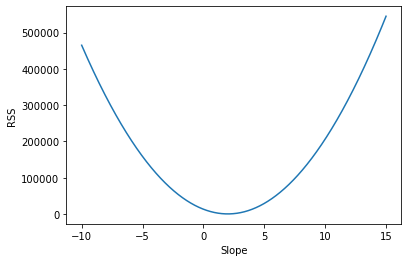

In [9]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel('Slope')
plt.ylabel('RSS')

MODELS

In [10]:
import statsmodels.api as sm

In [11]:
mod = sm.OLS(y,x)
est = mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                    1.14e-75
Time:                        12:00:13   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
X = sm.add_constant(x)
mod = sm.OLS(y,X)
est = mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           7.47e-82
Time:                        12:00:13   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

SCIKIT - LEARN BASICS

In [13]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)

In [14]:
x_1 = 10*ss.uniform.rvs(size=n)
x_2 = 10*ss.uniform.rvs(size=n)
y = beta_0 + beta_1*x_1 + beta_2*x_2 + ss.norm.rvs(loc=0, scale=1, size=n)

In [15]:
X = np.stack([x_1, x_2], axis=1)

Text(0.5, 0, '$y$')

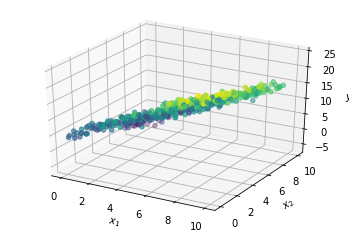

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$') 

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression(fit_intercept=True)

In [19]:
lm.fit(X, y)

LinearRegression()

In [20]:
lm.intercept_

5.154077763777254

In [21]:
lm.coef_[1]

-1.020264486993336

In [22]:
lm.coef_[0]

1.9999378989891399

In [23]:
X_0 = np.array([2, 4])
lm.predict(X_0.reshape(1,-1))

array([5.07289561])

In [24]:
lm.score(X, y)

0.9798997316600129

TRAINING AND TEST DATA

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [27]:
lm = LinearRegression(fit_intercept=True)
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
lm.score(X_test, y_test)

0.9794930834681773